# Capstone project

## Comparison between the cities of Zurich and Geneva (Switzerland)

# Introduction

In this notebook I will analyse and compare the neighborhoods of two swiss cities: Zurich and Geneva. I will provide a visual comparison and a numerical comparison by looking also at the population density of each neighborhood.

# Data

I took the data from wikipedia pages:

- Zurich https://de.wikipedia.org/wiki/Stadtteile_der_Stadt_Z%C3%BCrich
    
- Geneva https://de.wikipedia.org/wiki/Genf#Stadtviertel

Unfortunately the population data refer to different years, I will use 2018 for Zurich and 2015 for Geneva.

From Wikipedia pages I downloaded as csv file the information about the cities of Zurich and Geneva. Let's have a look at the data by loading these two tables into two dataframes.

In [1]:
import pandas as pd
import numpy as np

### Loading Zurich data

In [2]:
zurich=pd.read_csv("zurich.csv")
zurich.head()

,Stadtkreis,Statistische Quartiere,BFS-Code,Fläche,Einwohner,Einwohner.1,Einwohner.2,Ausländer
0,Kreis 1,Rathaus,261011,0.38,3267,3194,3081,"30,1 %"
1,Kreis 1,Hochschulen,261012,0.56,664,665,695,"34,3 %"
2,Kreis 1,Lindenhof,261013,0.23,990,923,950,"30,1 %"
3,Kreis 1,City,261014,0.64,829,783,846,"30,0 %"
4,Kreis 2,Wollishofen,261021,5.75,18'923,15'937,15'592,"29,1 %"


First we change the name of some columns

In [3]:
zurich.columns=['District', 'Neighborhood', 'BFS-Code', 'Area(km^2)',
       'Population2018', 'Population2013', 'Population2005', 'Foreigns (%)']
zurich.head()

,District,Neighborhood,BFS-Code,Area(km^2),Population2018,Population2013,Population2005,Foreigns (%)
0,Kreis 1,Rathaus,261011,0.38,3267,3194,3081,"30,1 %"
1,Kreis 1,Hochschulen,261012,0.56,664,665,695,"34,3 %"
2,Kreis 1,Lindenhof,261013,0.23,990,923,950,"30,1 %"
3,Kreis 1,City,261014,0.64,829,783,846,"30,0 %"
4,Kreis 2,Wollishofen,261021,5.75,18'923,15'937,15'592,"29,1 %"


We now look at the data type for each column by using .info()

In [4]:
zurich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
District          34 non-null object
Neighborhood      34 non-null object
BFS-Code          34 non-null int64
Area(km^2)        34 non-null float64
Population2018    34 non-null object
Population2013    34 non-null object
Population2005    34 non-null object
Foreigns (%)      34 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.2+ KB


We have some problems with data types and format.

The data in the three columns with the population in 2018, 2013 and 2015 are strings not numerical values and some data in population columns have " ' " as thousand separator.

In [5]:
for cat in ["Population2018","Population2013", "Population2005"]:
    zurich[cat]=zurich[cat].apply(lambda x: int("".join(x.split("'"))))
    print(cat)
    print(zurich[cat].dtype)

Population2018
int64
Population2013
int64
Population2005
int64


The data in the foreigns column are also not numerical values and have a comma as decimal separator

We leave only the number, without the %

In [6]:
zurich["Foreigns (%)"]=zurich["Foreigns (%)"].apply(lambda x: float((".".join(x.split(","))).split("%")[0]))
zurich["Foreigns (%)"].dtype

dtype('float64')

In [7]:
zurich.head()

,District,Neighborhood,BFS-Code,Area(km^2),Population2018,Population2013,Population2005,Foreigns (%)
0,Kreis 1,Rathaus,261011,0.38,3267,3194,3081,30.1
1,Kreis 1,Hochschulen,261012,0.56,664,665,695,34.3
2,Kreis 1,Lindenhof,261013,0.23,990,923,950,30.1
3,Kreis 1,City,261014,0.64,829,783,846,30.0
4,Kreis 2,Wollishofen,261021,5.75,18923,15937,15592,29.1


I add three columns:
- 1 for the population density (Population2018/Area) 
- 2 for the coordinates of the Neighborhoods "Latitude" and "Longitudine", in a format that will be useful to get the coordinates.

In [8]:
zurich["PopDens"]=zurich.Population2018/zurich["Area(km^2)"]
zurich["Latitude"]=(zurich.Neighborhood+", "+zurich.District)
zurich["Longitude"]=(zurich.Neighborhood+", "+zurich.District)
zurich.head()

,District,Neighborhood,BFS-Code,Area(km^2),Population2018,Population2013,Population2005,Foreigns (%),PopDens,Latitude,Longitude
0,Kreis 1,Rathaus,261011,0.38,3267,3194,3081,30.1,8597.368421,"Rathaus, Kreis 1","Rathaus, Kreis 1"
1,Kreis 1,Hochschulen,261012,0.56,664,665,695,34.3,1185.714286,"Hochschulen, Kreis 1","Hochschulen, Kreis 1"
2,Kreis 1,Lindenhof,261013,0.23,990,923,950,30.1,4304.347826,"Lindenhof, Kreis 1","Lindenhof, Kreis 1"
3,Kreis 1,City,261014,0.64,829,783,846,30.0,1295.312500,"City, Kreis 1","City, Kreis 1"
4,Kreis 2,Wollishofen,261021,5.75,18923,15937,15592,29.1,3290.956522,"Wollishofen, Kreis 2","Wollishofen, Kreis 2"


## Loading Geneve data

In [9]:
geneve=pd.read_csv("genf.csv")
geneve

,Viertel,Quartier,Nr.,BFS-Code,Fläche,Einwohner
0,NaN,NaN,NaN,NaN,ha[12],(Ende 2015)
1,Cité,Cité – Centre,1.0,6621001.0,106,6'720
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,St-Gervais – Chantepoulet,2.0,6621002.0,47,4'474
8,NaN,Délices – Grottes – Montbrillant,3.0,6621003.0,68,13'806
9,NaN,Pâquis,4.0,6621004.0,42,10'650


The NaN values in Quartier, Nr., BFS-Code and Fläche columns are due to the format of the table on wikipedia. We can easily remove those rows (index between 2 and 6) and the first row (index=0) as well. Since I couldn't find the coordinates of the neighborhood O.N.U. by means of the geocode I decided to remove the row with index 17 as well.

In [10]:
for n in [0,2,3,4,5,6,17]:
    geneve.drop(n, axis=0, inplace=True)

In [11]:
geneve.columns=['District', 'Neighborhood', 'Number', 'BFS-Code', 'Area', 'Population2015']

In [12]:
#reset the index
geneve.reset_index(drop=True, inplace=True)
geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015
0,Cité,Cité – Centre,1.0,6621001.0,106,6'720
1,NaN,St-Gervais – Chantepoulet,2.0,6621002.0,47,4'474
2,NaN,Délices – Grottes – Montbrillant,3.0,6621003.0,68,13'806
3,NaN,Pâquis,4.0,6621004.0,42,10'650
4,Plainpalais,Champel,11.0,6621011.0,180,17'968


The NaN values in the district column is due to the fact that different neighborhoods belong to the same district. We fill this missing information with the following code:

In [13]:
gen_dist=list(geneve.District.dropna()) #list of the districts
geneve.District=geneve.District.fillna("0")

dis="Cité"
districts_genf=[]
for i in list(geneve.index):
    if geneve.iloc[i]["District"]!="0":
        dis=geneve.iloc[i]["District"]      
    districts_genf.append(dis)

geneve.District=districts_genf

geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015
0,Cité,Cité – Centre,1.0,6621001.0,106,6'720
1,Cité,St-Gervais – Chantepoulet,2.0,6621002.0,47,4'474
2,Cité,Délices – Grottes – Montbrillant,3.0,6621003.0,68,13'806
3,Cité,Pâquis,4.0,6621004.0,42,10'650
4,Plainpalais,Champel,11.0,6621011.0,180,17'968


In [14]:
geneve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
District          15 non-null object
Neighborhood      15 non-null object
Number            15 non-null float64
BFS-Code          15 non-null float64
Area              15 non-null object
Population2015    15 non-null object
dtypes: float64(2), object(4)
memory usage: 800.0+ bytes


I transform Area and Population2015 into numerical values and in the latter I remove the " ' " as decimal separator. The area of neighborhoods is in ha, I convert it into km^2 by dividing for a factor of 100.

In [15]:
geneve.Population2015=geneve.Population2015.apply(lambda x: int("".join(x.split("'"))))
geneve.Area=geneve.Area.apply(float)
geneve.Area=geneve.Area/100
geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015
0,Cité,Cité – Centre,1.0,6621001.0,1.06,6720
1,Cité,St-Gervais – Chantepoulet,2.0,6621002.0,0.47,4474
2,Cité,Délices – Grottes – Montbrillant,3.0,6621003.0,0.68,13806
3,Cité,Pâquis,4.0,6621004.0,0.42,10650
4,Plainpalais,Champel,11.0,6621011.0,1.80,17968


I transform the values in Number columns into integers:

In [16]:
geneve.Number=geneve.Number.apply(int)
geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015
0,Cité,Cité – Centre,1,6621001.0,1.06,6720
1,Cité,St-Gervais – Chantepoulet,2,6621002.0,0.47,4474
2,Cité,Délices – Grottes – Montbrillant,3,6621003.0,0.68,13806
3,Cité,Pâquis,4,6621004.0,0.42,10650
4,Plainpalais,Champel,11,6621011.0,1.80,17968


The neighborhood St-Gervais is written incorrect, it is indeed St.Gervais. I correct that:

In [17]:
geneve.Neighborhood=geneve.Neighborhood.apply(lambda x: x.replace("-" , '.'))
geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015
0,Cité,Cité – Centre,1,6621001.0,1.06,6720
1,Cité,St.Gervais – Chantepoulet,2,6621002.0,0.47,4474
2,Cité,Délices – Grottes – Montbrillant,3,6621003.0,0.68,13806
3,Cité,Pâquis,4,6621004.0,0.42,10650
4,Plainpalais,Champel,11,6621011.0,1.80,17968


If I try to get the coordinates of the neighborhoods as they are I cannot get all of them:

In [18]:
from geopy.geocoders import Nominatim

geolocator=Nominatim(user_agent="foursquare_agent")

for n in geneve.Neighborhood: 
    address="{}, {}, {}".format(n,"Genf","Switzerland")
    coord=geolocator.geocode(address)
    print("---")
    print(n)
    print(coord)

---
Cité – Centre
Cité, Genève, 1204, Schweiz/Suisse/Svizzera/Svizra
---
St.Gervais – Chantepoulet
None
---
Délices – Grottes – Montbrillant
None
---
Pâquis
Pâquis, Genève, Schweiz/Suisse/Svizzera/Svizra
---
Champel
Champel, Genève, 1206, Schweiz/Suisse/Svizzera/Svizra
---
La Cluse
Boulevard de la Cluse, Plainpalais, Genève, 1205, Schweiz/Suisse/Svizzera/Svizra
---
Jonction
Jonction, Genève, 1200, Schweiz/Suisse/Svizzera/Svizra
---
Bâtie – Acacias
None
---
Eaux.Vives – Lac
Eaux-Vives, Genève, Schweiz/Suisse/Svizzera/Svizra
---
Florissant – Malagnou
None
---
Sécheron
Sécheron, Pâquis, Genève, 1202, Schweiz/Suisse/Svizzera/Svizra
---
Grand.Pré – Vermont
None
---
Bouchet – Moillebeau
Rue Paul-Bouchet, Grottes et Saint-Gervais, Genève, 1201, Schweiz/Suisse/Svizzera/Svizra
---
Charmilles – Châtelaine
None
---
St.Jean – Aire
None


In order to get neighborhood coordinates I have to use only the first name for each row in neighborhood column, because unfortunately I couldn't find population information or area of the other neighboroods (for instance Chantepoulet in the second row). I add here two columns for the coordinates, in a format that will be useful to get the coordinates later. I add also a column with population density (Population2015/Area) 

In [19]:
geneve["PopDens"]=geneve.Population2015/geneve.Area
geneve["Latitude"]=geneve.Neighborhood.apply(lambda x: x.split("–")[0])
geneve["Longitude"]=geneve.Neighborhood.apply(lambda x: x.split("–")[0])

In [20]:
geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015,PopDens,Latitude,Longitude
0,Cité,Cité – Centre,1,6621001.0,1.06,6720,6339.622642,Cité,Cité
1,Cité,St.Gervais – Chantepoulet,2,6621002.0,0.47,4474,9519.148936,St.Gervais,St.Gervais
2,Cité,Délices – Grottes – Montbrillant,3,6621003.0,0.68,13806,20302.941176,Délices,Délices
3,Cité,Pâquis,4,6621004.0,0.42,10650,25357.142857,Pâquis,Pâquis
4,Plainpalais,Champel,11,6621011.0,1.80,17968,9982.222222,Champel,Champel


### Getting the coordinates

We first define functions to get the coordinates:

In [21]:
def getlat(row,city,state):
    address="{}, {}, {}".format(row,city,state)
    coord=geolocator.geocode(address)
    latitude=coord.latitude
    return latitude

def getlng(row,city,state):
    address="{}, {}, {}".format(row,city,state)
    coord=geolocator.geocode(address)
    longitude=coord.longitude
    return longitude

And functions to add the coordinates to a dataframe:

In [22]:
def add_lat(df,col,city,state):
    df[col]=df[col].apply(lambda x: getlat(x,city,state))
    return df

def add_lng(df,col,city,state):
    df[col]=df[col].apply(lambda x: getlng(x,city,state))
    return df

I add now the coordinates to the dataframes

In [23]:
zurich=add_lat(zurich,"Latitude","Zurich","Switzerland")
zurich=add_lng(zurich,"Longitude","Zurich","Switzerland")
geneve=add_lat(geneve,"Latitude","Genf","Switzerland")
geneve=add_lng(geneve,"Longitude","Genf","Switzerland")

### Selecting the column for each dataframe

We now have two dataframes:

In [24]:
zurich.head()

,District,Neighborhood,BFS-Code,Area(km^2),Population2018,Population2013,Population2005,Foreigns (%),PopDens,Latitude,Longitude
0,Kreis 1,Rathaus,261011,0.38,3267,3194,3081,30.1,8597.368421,47.372649,8.544311
1,Kreis 1,Hochschulen,261012,0.56,664,665,695,34.3,1185.714286,47.373846,8.548613
2,Kreis 1,Lindenhof,261013,0.23,990,923,950,30.1,4304.347826,47.372996,8.540799
3,Kreis 1,City,261014,0.64,829,783,846,30.0,1295.312500,47.372943,8.535346
4,Kreis 2,Wollishofen,261021,5.75,18923,15937,15592,29.1,3290.956522,47.342427,8.530708


In [25]:
geneve.head()

,District,Neighborhood,Number,BFS-Code,Area,Population2015,PopDens,Latitude,Longitude
0,Cité,Cité – Centre,1,6621001.0,1.06,6720,6339.622642,46.201035,6.146221
1,Cité,St.Gervais – Chantepoulet,2,6621002.0,0.47,4474,9519.148936,46.210723,6.139083
2,Cité,Délices – Grottes – Montbrillant,3,6621003.0,0.68,13806,20302.941176,46.207626,6.133291
3,Cité,Pâquis,4,6621004.0,0.42,10650,25357.142857,46.219521,6.147314
4,Plainpalais,Champel,11,6621011.0,1.80,17968,9982.222222,46.191490,6.158405


We keep now only the columns that could be useful for further analysis:

In [28]:
df_zurich=zurich[["District","Neighborhood","PopDens","Latitude","Longitude"]]
df_geneve=geneve[["District","Neighborhood","PopDens","Latitude","Longitude"]]

In [29]:
df_zurich.head()

,District,Neighborhood,PopDens,Latitude,Longitude
0,Kreis 1,Rathaus,8597.368421,47.372649,8.544311
1,Kreis 1,Hochschulen,1185.714286,47.373846,8.548613
2,Kreis 1,Lindenhof,4304.347826,47.372996,8.540799
3,Kreis 1,City,1295.312500,47.372943,8.535346
4,Kreis 2,Wollishofen,3290.956522,47.342427,8.530708


In [30]:
df_geneve.head()

,District,Neighborhood,PopDens,Latitude,Longitude
0,Cité,Cité – Centre,6339.622642,46.201035,6.146221
1,Cité,St.Gervais – Chantepoulet,9519.148936,46.210723,6.139083
2,Cité,Délices – Grottes – Montbrillant,20302.941176,46.207626,6.133291
3,Cité,Pâquis,25357.142857,46.219521,6.147314
4,Plainpalais,Champel,9982.222222,46.191490,6.158405


# Methodology and some Results

I will have a look first at the neighborhoods on the map.

## First maps of the cities

#### I define first the function to create a map of a city

In [31]:
import folium

def create_map(df,col_neigh, col_lat, col_long,coordinates,zoom_s, color):
    city_map=folium.Map(location=[coordinates.latitude,coordinates.longitude],zoom_start=zoom_s)
    for label, lat, long in zip(df[col_neigh], df[col_lat], df[col_long]):
        folium.CircleMarker([lat,long],
                        radius=5,
                        color=color,
                       fill=True,
                       popup=label,
                       fill_color=color,
                       fill_opacity=0.3).add_to(city_map)
    return city_map

#### Map of Zurich

In [32]:
a_zurich="Zurich, Switzerland"
coord_zurich=geolocator.geocode(a_zurich)

zurich_map=create_map(df_zurich, "Neighborhood",
                     "Latitude", "Longitude",coord_zurich, 12, "blue")
zurich_map
    

### Map of Geneve

In [33]:
a_geneve="Geneve, Switzerland"
coord_geneve=geolocator.geocode(a_geneve)

geneve_map=create_map(df_geneve, "Neighborhood",
                     "Latitude", "Longitude",coord_geneve, 12, "red")
geneve_map

For both cities I am interested into:
- find the venues and see which are the most common venues in each neighbhorhood
- cluster the neighborhoods by using KMeans
- visualize the clusters on the map including information about population density

At the end I will do a comparison between the two cities based on my findings.

# Results

## Getting the venues and categories

We need to access foursquare, I do not display here these private information (CLIENT_ID and CLIENT_SECRET)

In [1]:
# @hidden_cell
CLIENT_ID="xx"
CLIENT_SECRET='xx'

In [35]:
VERSION='20180604'
radius=300
limit=30

In [36]:
import requests
#This is the function to get the venue categories
def getvenues(neighs,latitudes, longitudines, radius):
    venues=[]
    for n,lat,long in zip(neighs,latitudes,longitudines):
        print(n)
        url="https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,radius,limit)
        results=requests.get(url).json()["response"]['groups'][0]['items']
        venues.append([(n,lat,long,v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    neigh_venues=pd.DataFrame([item for venue_list in venues for item in venue_list])
    neigh_venues.columns=['Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                 'Venue Latitude', 
                 'Venue Longitude', 
                 'Venue Category']
    return neigh_venues

def create_df_venues(df,col_neigh, col_lat, col_lng, radius):
    df=getvenues(df[col_neigh],df[col_lat],df[col_lng],radius)
    return df

In [37]:
df_venues_zu=create_df_venues(df_zurich,
                             "Neighborhood",
                              "Latitude",
                              "Longitude",
                             radius)

Rathaus
Hochschulen
Lindenhof
City
Wollishofen
Leimbach
Enge
Alt-Wiedikon
Friesenberg
Sihlfeld
Werd
Langstrasse
Hard
Gewerbeschule
Escher Wyss
Unterstrass
Oberstrass
Fluntern
Hottingen
Hirslanden
Witikon
Seefeld
Mühlebach
Weinegg
Albisrieden
Altstetten
Höngg
Wipkingen
Affoltern
Oerlikon
Seebach
Saatlen
Schwamendingen-Mitte
Hirzenbach


In [38]:
df_venues_ge=create_df_venues(df_geneve,
                             "Neighborhood",
                              "Latitude",
                              "Longitude",
                             radius)

Cité – Centre
St.Gervais – Chantepoulet
Délices – Grottes – Montbrillant
Pâquis
Champel
La Cluse
Jonction
Bâtie – Acacias
Eaux.Vives – Lac
Florissant – Malagnou
Sécheron
Grand.Pré – Vermont
Bouchet – Moillebeau
Charmilles – Châtelaine
St.Jean – Aire


In [39]:
print("There are {} different venue categories in the dataframe of Zurich".format(len(df_venues_zu["Venue Category"].unique())))

There are 122 different venue categories in the dataframe of Zurich


In [40]:
print("There are {} different venue categories in the dataframe of Geneve".format(len(df_venues_ge["Venue Category"].unique())))

There are 74 different venue categories in the dataframe of Geneve


## Creating the one hot dataframe with the venue categories

In [41]:
#ZURICH
df_oh_venues_zu=pd.get_dummies(df_venues_zu[['Venue Category']],prefix="",prefix_sep="")
df_oh_venues_zu.head()
    

,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,...,Tapas Restaurant,Tennis Court,Thai Restaurant,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#GENEVE
df_oh_venues_ge=pd.get_dummies(df_venues_ge[['Venue Category']],prefix="",prefix_sep="")
df_oh_venues_ge=df_oh_venues_ge.drop("Neighborhood",axis=1)
df_oh_venues_ge.head()

,Art Gallery,Asian Restaurant,Bakery,Bar,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,...,Taco Place,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Video Store,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
categories_zu=list(df_oh_venues_zu.columns)
categories_ge=list(df_oh_venues_ge.columns)
df_oh_venues_zu["Neighborhood"]=df_venues_zu["Neighborhood"]
df_oh_venues_ge["Neighborhood"]=df_venues_ge["Neighborhood"]
df_oh_venues_zu=df_oh_venues_zu[["Neighborhood"]+categories_zu]
df_oh_venues_ge=df_oh_venues_ge[["Neighborhood"]+categories_ge]

In [44]:
df_oh_venues_grouped_zu=df_oh_venues_zu.groupby("Neighborhood").mean()
df_oh_venues_grouped_zu.head()

,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,...,Tapas Restaurant,Tennis Court,Thai Restaurant,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Affoltern,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Albisrieden,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000
Alt-Wiedikon,0.0,0.0,0.1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.100000,...,0.0,0.0,0.1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Altstetten,0.0,0.0,0.0,0.0,0.000000,0.0,0.058824,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000
City,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.033333,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.066667,0.033333,0.033333,0.033333


In [45]:
df_oh_venues_grouped_ge=df_oh_venues_ge.groupby("Neighborhood").mean()
df_oh_venues_grouped_ge.head()

,Art Gallery,Asian Restaurant,Bakery,Bar,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,...,Taco Place,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Video Store,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bouchet – Moillebeau,0.0,0.0,0.25,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.25,0.0,0.000000,0.0
Champel,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.333333,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.333333,0.0
Charmilles – Châtelaine,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.0,...,0.0,0.000000,0.100000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0
Cité – Centre,0.0,0.0,0.00,0.066667,0.0,0.000000,0.0,0.033333,0.000000,0.0,...,0.0,0.033333,0.000000,0.0,0.033333,0.0,0.00,0.0,0.000000,0.0
Délices – Grottes – Montbrillant,0.0,0.0,0.00,0.000000,0.0,0.083333,0.0,0.000000,0.083333,0.0,...,0.0,0.083333,0.083333,0.0,0.000000,0.0,0.00,0.0,0.083333,0.0


Let's see the categories of the top N venues for each neighborhood

In [46]:
N=2

print("ZURICH")
for n in df_oh_venues_grouped_zu.index:
    print(n)
    print(df_oh_venues_grouped_zu.loc[n].sort_values(ascending=False).head(N))
    
print("GENEVE")
for n in df_oh_venues_grouped_ge.index:
    print(n)
    print(df_oh_venues_grouped_ge.loc[n].sort_values(ascending=False).head(N))

ZURICH
Affoltern
Bus Station           0.2
Italian Restaurant    0.2
Name: Affoltern, dtype: float64
Albisrieden
Swiss Restaurant    0.333333
Restaurant          0.166667
Name: Albisrieden, dtype: float64
Alt-Wiedikon
Italian Restaurant    0.2
Restaurant            0.2
Name: Alt-Wiedikon, dtype: float64
Altstetten
Tram Station    0.117647
Supermarket     0.117647
Name: Altstetten, dtype: float64
City
Bar           0.100000
Restaurant    0.066667
Name: City, dtype: float64
Enge
Wine Shop         0.090909
History Museum    0.090909
Name: Enge, dtype: float64
Escher Wyss
Hotel    0.086957
Bar      0.086957
Name: Escher Wyss, dtype: float64
Fluntern
Bakery          0.222222
Tram Station    0.222222
Name: Fluntern, dtype: float64
Friesenberg
Tennis Court    0.5
Stables         0.5
Name: Friesenberg, dtype: float64
Gewerbeschule
Café    0.115385
Bar     0.115385
Name: Gewerbeschule, dtype: float64
Hard
Park     0.5
Plaza    0.5
Name: Hard, dtype: float64
Hirslanden
Plaza    0.285714
Hotel   

I want to consider the population density as well. I create a new dataframe by merging df_oh_venues_ (not grouped) and the initial dataframes

In [64]:
#ZURICH
df_oh_venues_grouped_pop_zu=pd.merge(df_oh_venues_zu,df_zurich,how="inner",left_on="Neighborhood",right_on="Neighborhood")
df_oh_venues_grouped_pop_zu.drop("District", axis=1, inplace = True)
df_oh_venues_grouped_pop_zu=df_oh_venues_grouped_pop_zu.groupby("Neighborhood").mean()
df_oh_venues_grouped_pop_zu.head()

,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,...,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,PopDens,Latitude,Longitude
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Affoltern,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4397.682119,47.418762,8.507186
Albisrieden,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,4848.695652,47.374857,8.484657
Alt-Wiedikon,0.0,0.0,0.1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.100000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9705.945946,47.365562,8.517851
Altstetten,0.0,0.0,0.0,0.0,0.000000,0.0,0.058824,0.000000,0.0,0.000000,...,0.0,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,4479.384203,47.387403,8.486061
City,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.033333,0.0,0.033333,...,0.0,0.000000,0.000000,0.066667,0.033333,0.033333,0.033333,1295.312500,47.372942,8.535346


In [65]:
#GENEVE
df_oh_venues_grouped_pop_ge=pd.merge(df_oh_venues_ge,df_geneve,how="inner",left_on="Neighborhood",right_on="Neighborhood")
df_oh_venues_grouped_pop_ge.drop("District", axis=1, inplace = True)
df_oh_venues_grouped_pop_ge=df_oh_venues_grouped_pop_ge.groupby("Neighborhood").mean()
df_oh_venues_grouped_pop_ge.head()

,Art Gallery,Asian Restaurant,Bakery,Bar,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,...,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Video Store,Vietnamese Restaurant,PopDens,Latitude,Longitude
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bouchet – Moillebeau,0.0,0.0,0.25,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.25,0.0,0.000000,0.0,9504.968944,46.216246,6.118630
Champel,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.333333,0.0,...,0.0,0.000000,0.0,0.00,0.0,0.333333,0.0,9982.222222,46.191490,6.158405
Charmilles – Châtelaine,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,20466.956522,46.208158,6.127419
Cité – Centre,0.0,0.0,0.00,0.066667,0.0,0.000000,0.0,0.033333,0.000000,0.0,...,0.0,0.033333,0.0,0.00,0.0,0.000000,0.0,6339.622642,46.201035,6.146221
Délices – Grottes – Montbrillant,0.0,0.0,0.00,0.000000,0.0,0.083333,0.0,0.000000,0.083333,0.0,...,0.0,0.000000,0.0,0.00,0.0,0.083333,0.0,20302.941176,46.207626,6.133291


## Clustering the neighborhoods

I will cluster the neighborhood by means of KMeans. For each city I have to find the best k by looking at the average distance between points and their centroids as a function of k and then find the ellbow point of this curve.
Let's import what we need and create the functions to be applied to each city.

In [66]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [67]:
#this function calculate the average distance between points and their centroids over a 
# range of k values between 1 and kmax
def kerr_cluster_kmeans(df,categories,kmax):
    ks=list(range(1,kmax))
    err=[]
    for k in ks:
        km=KMeans(n_clusters=k,init="k-means++",n_init=12,random_state=0)
        km.fit(df[categories])
        labels=km.labels_
        centroids=km.cluster_centers_
        df["Cluster"]=labels
        errore=0
        for n in range(k):
            errore+=((centroids[n]-df[df["Cluster"]==n][categories])**2).sum(axis=0).sum()
        errore=np.sqrt(errore)/k
        err.append(errore)
    return df,np.array(ks), np.array(err)

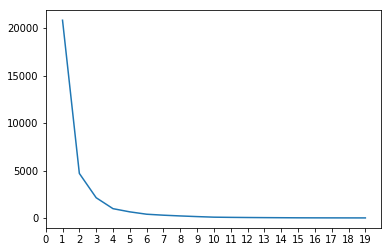

best k for Zurich is: 3


In [72]:
#ZURICH
categories_pop_zu=categories_zu+["PopDens"]
df_oh_venues_grouped_pop_zu,ks_zu,err_zu=kerr_cluster_kmeans(df_oh_venues_grouped_pop_zu,
                                                         categories_pop_zu,
                                                         20)
kn_zu = KneeLocator(ks_zu, err_zu, curve='convex', direction='decreasing')

plt.plot(ks_zu,err_zu)
plt.xticks(np.arange(0,20,1))
plt.show()
print("best k for Zurich is: {}".format(kn_zu.knee))

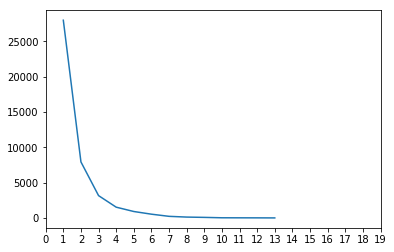

best k for Geneve is: 3


In [74]:
# GENEVE
categories_pop_ge=categories_ge+["PopDens"]
df_oh_venues_grouped_pop_ge,ks_ge,err_ge=kerr_cluster_kmeans(df_oh_venues_grouped_pop_ge,categories_pop_ge,14)

kn_ge = KneeLocator(ks_ge, err_ge, curve='convex', direction='decreasing')

plt.plot(ks_ge,err_ge)
plt.xticks(np.arange(0,20,1))
plt.show()

print("best k for Geneve is: {}".format(kn_ge.knee))

## Clustering

### Zurich

In [75]:
kstar=kn_zu.knee
km_zu=KMeans(n_clusters=kstar,init="k-means++",n_init=12,random_state=0)
km_zu.fit(df_oh_venues_grouped_pop_zu[categories_pop_zu])
labels_zu=km_zu.labels_
df_oh_venues_grouped_pop_zu["Cluster"]=labels_zu
df_oh_venues_grouped_pop_zu=df_oh_venues_grouped_pop_zu.reset_index()[["Cluster","Neighborhood"]+categories_pop_zu]
df_oh_venues_grouped_pop_zu.head()

,Cluster,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Automotive Shop,...,Tennis Court,Thai Restaurant,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,PopDens
0,0,Affoltern,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4397.682119
1,0,Albisrieden,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,4848.695652
2,1,Alt-Wiedikon,0.0,0.0,0.1,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9705.945946
3,0,Altstetten,0.0,0.0,0.0,0.0,0.000000,0.0,0.058824,0.000000,...,0.0,0.0,0.0,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,4479.384203
4,0,City,0.0,0.0,0.0,0.0,0.033333,0.0,0.000000,0.033333,...,0.0,0.0,0.0,0.000000,0.000000,0.066667,0.033333,0.033333,0.033333,1295.312500


### Geneve

In [76]:
kstar=kn_ge.knee
km_ge=KMeans(n_clusters=kstar,init="k-means++",n_init=12,random_state=0)
km_ge.fit(df_oh_venues_grouped_pop_ge[categories_pop_ge])
labels_ge=km_ge.labels_
df_oh_venues_grouped_pop_ge["Cluster"]=labels_ge
df_oh_venues_grouped_pop_ge=df_oh_venues_grouped_pop_ge.reset_index()[["Cluster","Neighborhood"]+categories_pop_ge]
df_oh_venues_grouped_pop_ge.head()

,Cluster,Neighborhood,Art Gallery,Asian Restaurant,Bakery,Bar,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,...,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tram Station,Trattoria/Osteria,Video Store,Vietnamese Restaurant,PopDens
0,0,Bouchet – Moillebeau,0.0,0.0,0.25,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.25,0.0,0.000000,0.0,9504.968944
1,0,Champel,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.333333,0.0,9982.222222
2,2,Charmilles – Châtelaine,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.100000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,20466.956522
3,0,Cité – Centre,0.0,0.0,0.00,0.066667,0.0,0.000000,0.0,0.033333,...,0.033333,0.000000,0.0,0.033333,0.0,0.00,0.0,0.000000,0.0,6339.622642
4,2,Délices – Grottes – Montbrillant,0.0,0.0,0.00,0.000000,0.0,0.083333,0.0,0.000000,...,0.083333,0.083333,0.0,0.000000,0.0,0.00,0.0,0.083333,0.0,20302.941176


# Discussion

## Exploring the clusters

In order to explore the clusters I define some functions

In [77]:
#function from the lab to take the most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [78]:
# function to create a new dataframe with the most common venues
def create_venues_sorted(num_top_venues,df_oh_grouped):
    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ["Cluster",'Neighborhood']

    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))


    # create a new dataframe
    df_sorted = pd.DataFrame(columns=columns)
    df_sorted['Neighborhood'] = df_oh_grouped['Neighborhood']
    df_sorted['Cluster'] = df_oh_grouped['Cluster']

    for ind in np.arange(df_oh_grouped.shape[0]):
        df_sorted.iloc[ind, 2:] = return_most_common_venues(df_oh_grouped.iloc[ind, 2:], num_top_venues)
    
    return df_sorted

In [79]:
#function to merge the dataframe with the most common venues with the initial dataframe

def merging(df_sorted,df, left_on, right_on):
    df_merged=pd.merge(df_sorted,df,how="inner",left_on=left_on,right_on=right_on)
    return df_merged

In [80]:
#function to explore the num_col most common venues
def explore_cluster(df,num_col, k_cluster):
    for n in range(k_cluster):
        print("Cluster {}".format(n))
        print(df[df["Cluster"]==n]["Neighborhood"].count())
        #print(df_clustered[df_clustered["Cluster"]==n][["1st Most Common Venue","2nd Most Common Venue","3rd Most Common Venue","4th Most Common Venue","5th Most Common Venue"]].head(5))
    for n in range(k_cluster):
        print("Cluster {}".format(n))
        cat=[]
        for i in range(2,2+num_col):
            cat.extend(df[df["Cluster"]==n][df.columns[i]].unique())
        print(set(sorted(cat)))

### Exploring Zurich (zu) and Geneve (ge) clusters

In [81]:
#Most common venues
num_top_venues=5
df_venues_sorted_zu=create_venues_sorted(num_top_venues,df_oh_venues_grouped_pop_zu)
df_venues_sorted_ge=create_venues_sorted(num_top_venues,df_oh_venues_grouped_pop_ge)


In [82]:
#create new dataframe merging the initial dataframe and the sorted one
df_clustered_zu=merging(df_venues_sorted_zu,df_zurich, "Neighborhood", "Neighborhood")
df_clustered_ge=merging(df_venues_sorted_ge,df_geneve, "Neighborhood", "Neighborhood")


Let's have a look at the information available by displaying them on a map

#### Zurich

In [91]:
kn_zu.knee

3

We have 3 clusters. I create a map with different colours for each cluster. The dots have a radius proportional to the population density of the neighborhood (population of each neighborhood divided by the area of the neighborhood) multiplied by a factor of 0.0011 to allow a correct visualization on the map.

In [88]:
zu_map_clustered=folium.Map(location=[coord_zurich.latitude,coord_zurich.longitude],zoom_start=12)
colors=["blue","red", "green"]
for n,c,lat,long,p in zip(df_clustered_zu.Neighborhood,df_clustered_zu.Cluster,
                          df_clustered_zu.Latitude,df_clustered_zu.Longitude,df_clustered_zu.PopDens):
    folium.CircleMarker([lat,long],
                       # radius=c+3,
                        radius=int(p*0.0011),
                       popup=n,
                       color=colors[c],
                       fill=True,
                       fill_color=colors[c],
                       fill_opacity=0.4).add_to(zu_map_clustered)

zu_map_clustered

From the map we can see that cluster 0 is the cluster with least dense populated neighborhoods, most of them are outisde of the center. Cluster 1 (red) has average population density and cluster 2 (green) is the one with most dense populated neighbhorhoods.

Let's have a look at the num_col most important categories for each neighborhood of each cluster.

In [92]:
num_col=3
explore_cluster(df_clustered_zu,num_col, kn_zu.knee)

Cluster 0
22
Cluster 1
9
Cluster 2
3
Cluster 0
{'Italian Restaurant', 'Coffee Shop', 'Asian Restaurant', 'Tram Station', 'Tennis Court', 'Modern European Restaurant', 'Plaza', 'Trattoria/Osteria', 'Stables', 'Bar', 'Wine Shop', 'Supermarket', 'Art Museum', 'Bakery', 'Grocery Store', 'Hotel', 'Bus Station', 'Swiss Restaurant', 'PopDens', 'Indian Restaurant', 'Moroccan Restaurant', 'Lounge', 'Department Store'}
Cluster 1
{'Italian Restaurant', 'Supermarket', 'Plaza', 'Café', 'Hotel', 'Pizza Place', 'Health & Beauty Service', 'Park', 'Bar', 'Bakery', 'Restaurant', 'PopDens', 'Swiss Restaurant', 'Indian Restaurant'}
Cluster 2
{'Café', 'Bar', 'Swiss Restaurant', 'PopDens', 'Pub', 'Tapas Restaurant'}


We can see that for all clusters PopDens is one of the categories on the top. The venues in Cluster 2 (green) are also characteristic of a central region of a city. Cluster 0 (blue) includes touristic venues such as Museums and restaurants (due to the neighborhoods in the centre). Cluster 1 (red) is more heterogeneous.

### Geneve

In [95]:
kn_ge.knee

3

We have 3 clusters. I create a map with different colours for each cluster. The dots have a radius proportional to the density population of the neighborhood, population of each neighborhood divided by the area of the neighborhood, normalized by a factor of 0.0005 to allow a correct visualization on the map

In [96]:
ge_map_clustered=folium.Map(location=[coord_geneve.latitude,coord_geneve.longitude],zoom_start=13)
colors=["blue","red","green"]
for n,c,lat,long,p in zip(df_clustered_ge.Neighborhood,df_clustered_ge.Cluster,
                          df_clustered_ge.Latitude,df_clustered_ge.Longitude,
                          df_clustered_ge.PopDens):
    folium.CircleMarker([lat,long],
                       radius=int(p*0.0005),
                       popup=n,
                       color=colors[c],
                       fill=True,
                       fill_color=colors[c],
                       fill_opacity=0.4).add_to(ge_map_clustered)

ge_map_clustered

In [97]:
num_col=3
explore_cluster(df_clustered_ge,num_col, kn_ge.knee)

Cluster 0
7
Cluster 1
2
Cluster 2
5
Cluster 0
{'Cocktail Bar', 'Supermarket', 'Hotel', 'Coffee Shop', 'Park', 'Bar', 'Bakery', 'Swiss Restaurant', 'PopDens', 'Tram Station', 'Video Store', 'French Restaurant'}
Cluster 1
{'Burger Joint', 'Café', 'Music Venue', 'Park', 'PopDens'}
Cluster 2
{'Nature Preserve', 'Supermarket', 'Café', 'Hotel', 'Bakery', 'PopDens', 'Tea Room', 'Thai Restaurant', 'French Restaurant'}


In this case one cluster (0, blue on the map) spread all over the city with low population density, mainly charachterised by restaurants. The most dense populated neighborhoods are peripherical (cluster 1, red on the map). From venues point of view the categories seem heterogeneous.

# Conclusion

By looking at the maps and the clusters I can say that in both cities there is a major cluster which is spread all over the city and particularly in the centre, in this sense Zurich and Geneva are similar, but this effect is much stronger in Zurich. On the other hand the distribution of population is different, the population density in Geneva is more homogeneous compared to that one in Zurich and one can notice a slightly higher density not in the centre, but in the peripherical regions.